In [2]:
# Взял датасет на 30000 строк из kaggle.com
# В датасете представлена информация по изделиям женского нижнего белья из интернет магазина amazon.com
# Перед тем как приступить к анализу, сделал необходимую очитску даных(удалил пустые строки и разные ошибки, привел типы)
# Информация о ценах, типе белья, его цвете, названии, брендах, рейтингах среди покупателей
# Постарался анализировать и представить в графическом виде эту информацию и сделать выводы о разных зависимостях(например как цена влияет на рейтинг)
# 
#

In [3]:
#подключение необходимых библиотек
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
from ludwig.utils import data_utils
import seaborn as sn
from wordcloud import WordCloud, STOPWORDS
from matplotlib import rcParams

In [4]:
#чтение датасета
data = pd.read_csv('innerwear_3.csv', sep=',')

In [3]:
#количество строк и столбцов
data.shape

(31611, 14)

In [4]:
#названия категорий
data.isnull().sum()

product_name        0
mrp                 0
price               0
pdp_url             0
brand_name          0
product_category    0
retailer            0
description         0
rating              0
review_count        0
style_attributes    0
total_sizes         0
available_size      0
color               0
dtype: int64

In [5]:
#удаление ячеек содержащих NaN
data=data.fillna(" ")

In [ ]:
#замена знака доллара перед ценой, чтобы привести к integer
data['price']=data['price'].replace('\$',' ',regex=True).astype(float)


In [128]:
#сохранение в датафрейм
data.to_csv('shop_nordstrom_com.csv', index=False)

In [6]:
#названия брендов
data['brand_name'].unique()

array(['Calvin-Klein', 'Wacoal', 'Hanky-Panky', 'b-temptd',
       'Victoriaxxx-Secret', 'Fila', 'Lucky-Brand', 'Creative-Motion',
       'Sexy-Hair', 'Nintendo', 'Comprexxxxxxion-Comfort'], dtype=object)

In [125]:
data['price']=data['price'].replace('$31.20',' ',regex=True).astype('string')

In [127]:
data.drop([11700, 11699], axis = 0, inplace = True)

In [15]:
data = data.dropna()

In [38]:
#показ строк с указанным названием ячейки
display(data[(data['brand_name']=='ref=w_bl_xxxl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brandxxx_browxxxe-bin=Wacoal')])

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
16744,Wacoal Women's Halo Underwire Bra,$48.00,45.0,https://www.amazon.com/-/dp/B00KIL4CJ6?th=1&psc=1,ref=w_bl_xxxl_l_b_ap_web_2603426011?ie=UTF8&no...,Bras,Amazon US,Beautiful all over cross-dye soft lace cups an...,4.4,381,"[ 82% Nylon, 18% Spandex , Imported , Hand Was...","32C , 32D , 32DD , 32DDD , 32G , 34B , 34C , 3...","32D , 32DD , 32DDD , 32G , 34B , 34C , 34D , 3...",Toast
30993,Wacoal Women's Full Figure Basic Beauty Underw...,$50.00,47.0,https://www.amazon.com/-/dp/B002UIEB9G?th=1&psc=1,ref=w_bl_xxxl_l_b_ap_web_2603426011?ie=UTF8&no...,Bras,Amazon US,Seamless molded two-ply cups with inner sling ...,4.2,957,"[ 85% Nylon/15% Spandex , Imported , Hook and ...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...",Black


In [133]:
#количество изделий по брендам
data[["brand_name", "price"]]
a = data['brand_name'].value_counts().head()
a

Wacoal                20089
Calvin-Klein           7376
b-temptd               3491
Hanky-Panky             582
Victoriaxxx-Secret       67
Name: brand_name, dtype: int64

In [7]:
#топ-3 популярных брендов
print('Всего', data['brand_name'].nunique(), 'брендов')
print ('Трое самых популярных:')
data['brand_name'].value_counts()[:3] 


Всего 11 брендов
Трое самых популярных:


Wacoal          20089
Calvin-Klein     7376
b-temptd         3491
Name: brand_name, dtype: int64

Text(0.5, 1.0, 'Количество изделий по брендам')

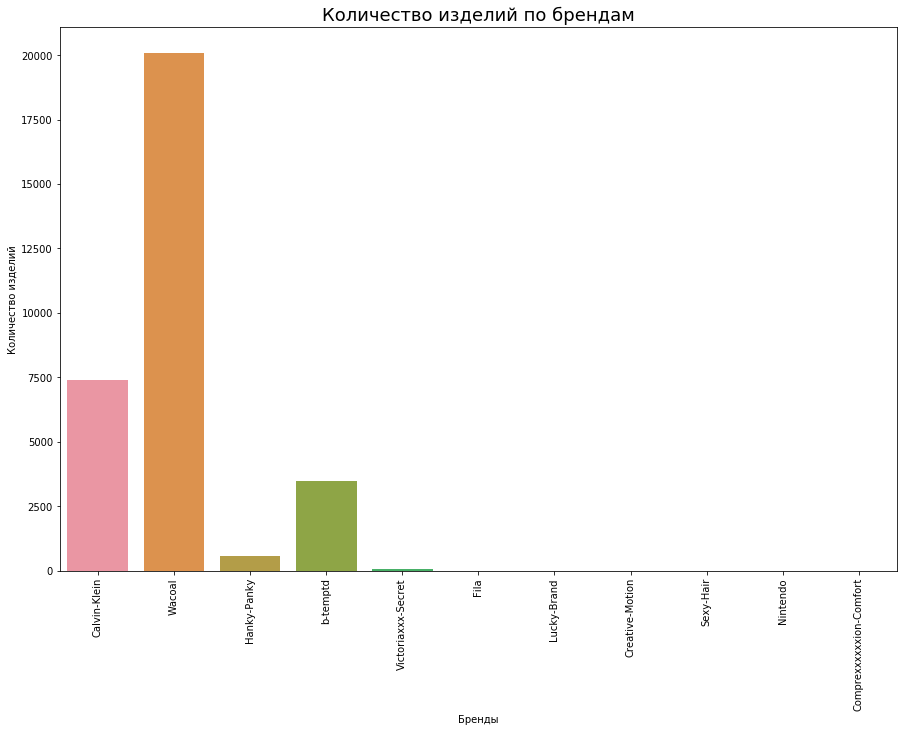

In [25]:
#Количество изделий по брендам
plt.figure(figsize=(15,10))
p = sn.countplot(data['brand_name'])
plt.xlabel('Бренды')
plt.ylabel('Количество изделий')
p1 = plt.setp(p.get_xticklabels(), rotation=90)
plt.title("Количество изделий по брендам", fontsize = '18')

In [9]:
#Средняя цена по брендам
average=data.groupby('brand_name')['price'].mean().sort_values(ascending=False)
print("Средняя цена:\n",average)

Средняя цена:
 brand_name
Comprexxxxxxion-Comfort    68.000000
Sexy-Hair                  54.870000
Wacoal                     52.140074
Victoriaxxx-Secret         40.402537
Hanky-Panky                31.270086
Calvin-Klein               31.214577
Nintendo                   30.400000
b-temptd                   28.887723
Fila                       27.000000
Creative-Motion            21.890000
Lucky-Brand                15.070000
Name: price, dtype: float64


In [10]:
#цвет изделий
data['color'].value_counts()

Black             5663
Naturally Nude    2825
Ivory             1778
White             1480
Cappuccino        1168
                  ... 
Lotus Gypset         1
Hot Pink             1
Pastel Green         1
Black Coffee         1
Hyacinth             1
Name: color, Length: 260, dtype: int64

Text(0.5, 1.0, 'Самые популярные цвета')

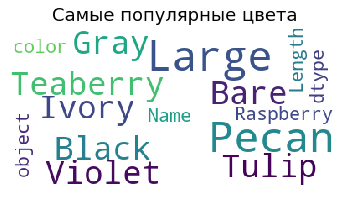

In [24]:
#показывает количество цветов по изделиям
para_docs=(data['color'].astype('str'))
oc_cloud= WordCloud(background_color='white',stopwords= STOPWORDS, max_words=100,max_font_size=50,random_state=1).generate(str(para_docs))
plt.imshow(oc_cloud)
plt.axis('off')
plt.title("Самые популярные цвета", fontsize = '18')

Text(0.5, 1.0, 'Количество цвета по цене изделия')

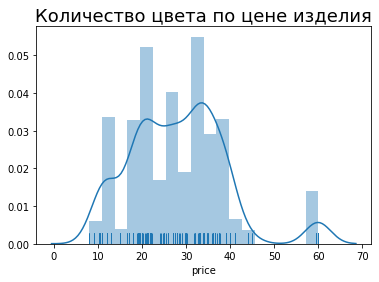

In [23]:
#распределния цвета от цены изделия
sn.distplot(data[data['color'] =='Large']['price'], rug=True)
plt.title("Количество цвета по цене изделия", fontsize = '18')

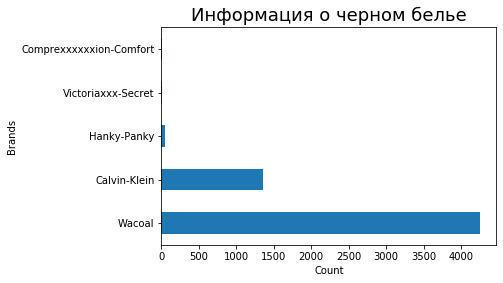

In [26]:
#топ брендов, которые используют черный цвет
Black= data[data['color'] =="Black"]
Black['brand_name'].value_counts()[:10].plot(kind='barh')
plt.title('Информация о черном белье', fontsize = 18)
plt.xlabel('Count', fontsize = 10)
plt.ylabel('Brands', fontsize = 10)
plt.show()

Text(0.5, 1.0, 'Бренды с самой большой средней стоимостью изделия')

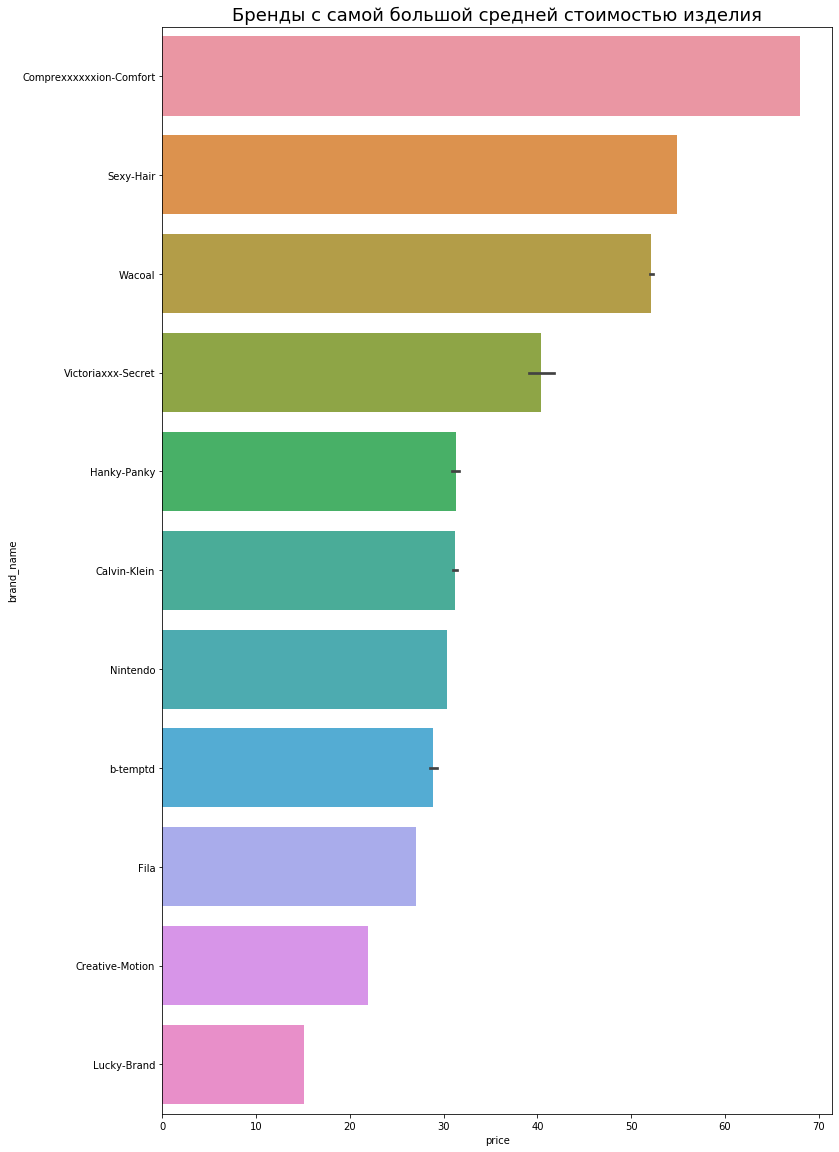

In [22]:
#зависимость цены от бренда
top50 = list(data.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(50).index)
df50 = data.loc[data['brand_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='brand_name', x='price', data=df50, order=top50)
plt.title("Бренды с самой большой средней стоимостью изделия", fontsize = '18')

Text(0.5, 1.0, 'Рейтинг брендов по оценкам на сайте магазина')

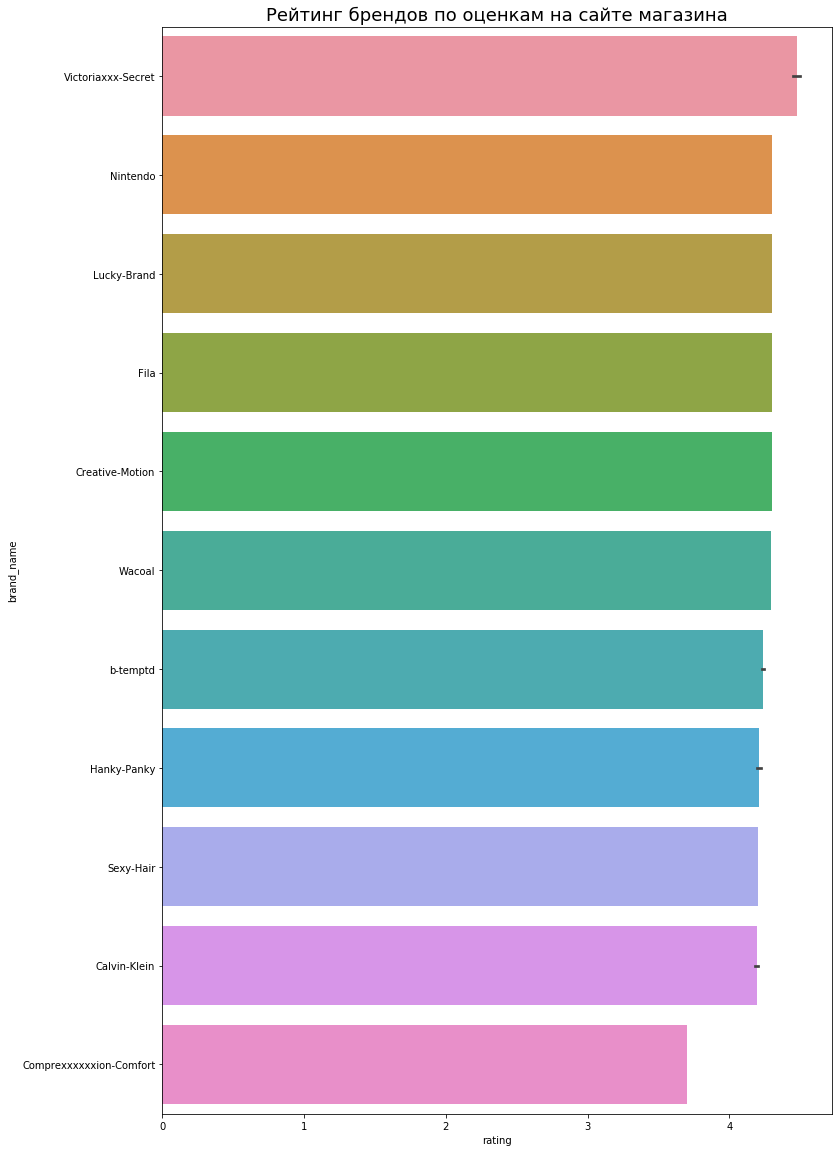

In [21]:
#зависимость рейтинга от бренда
top50 = list(data.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(50).index)
df50 = data.loc[data['brand_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='brand_name', x='rating', data=df50, order=top50)
plt.title("Рейтинг брендов по оценкам на сайте магазина", fontsize = '18')

Text(0.5, 1.0, 'Количество отзывов на изделие')

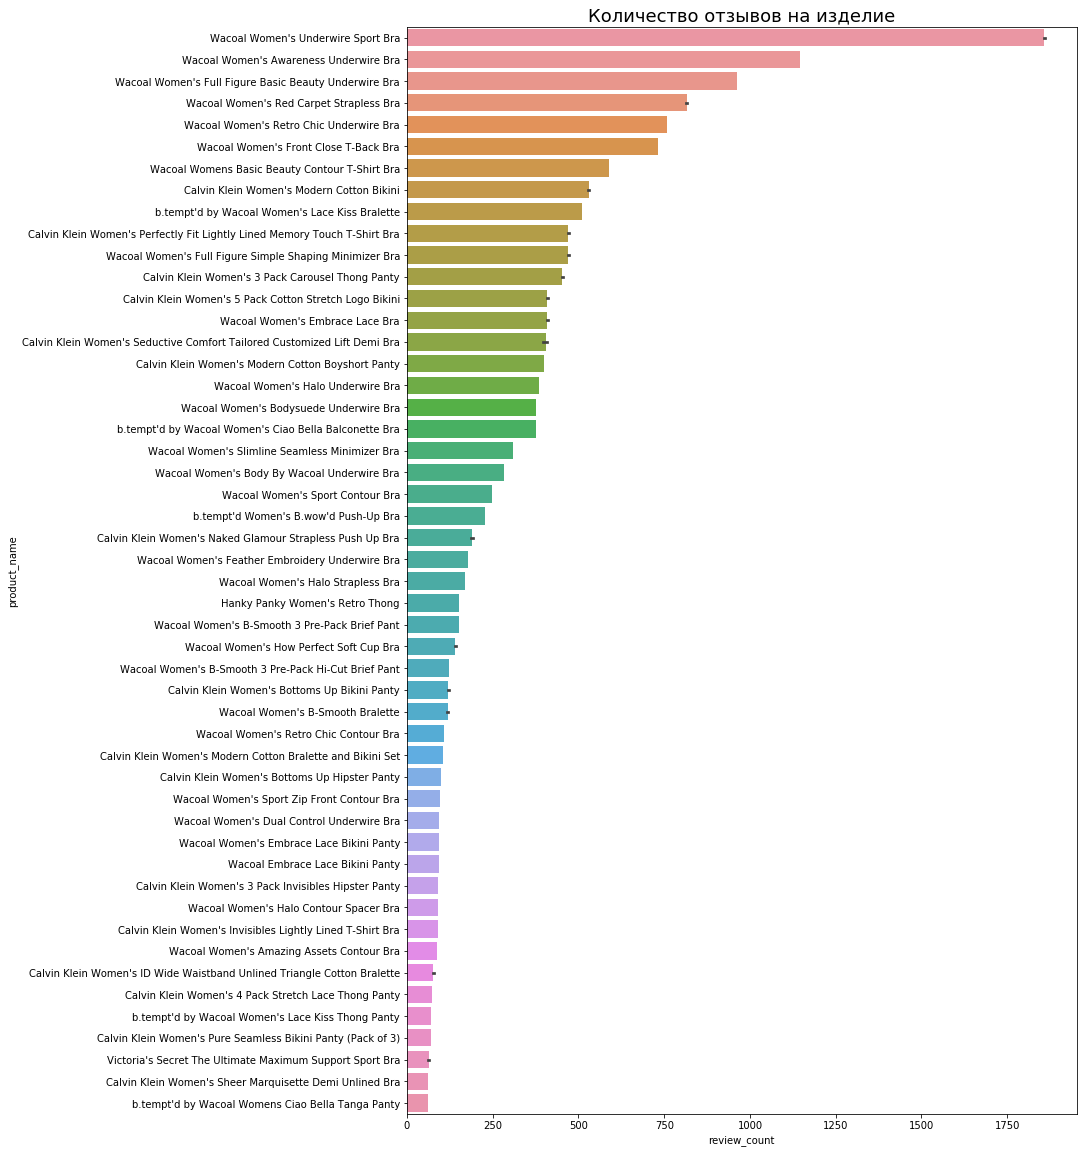

In [20]:
#количество отзывов на изделие
top50 = list(data.groupby('product_name')['review_count'].mean().sort_values(ascending=False).head(50).index)
df50 = data.loc[data['product_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='product_name', x='review_count', data=df50, order=top50)
plt.title("Количество отзывов на изделие", fontsize = '18')

Text(0.5, 1.0, 'Количество изделий по типу')

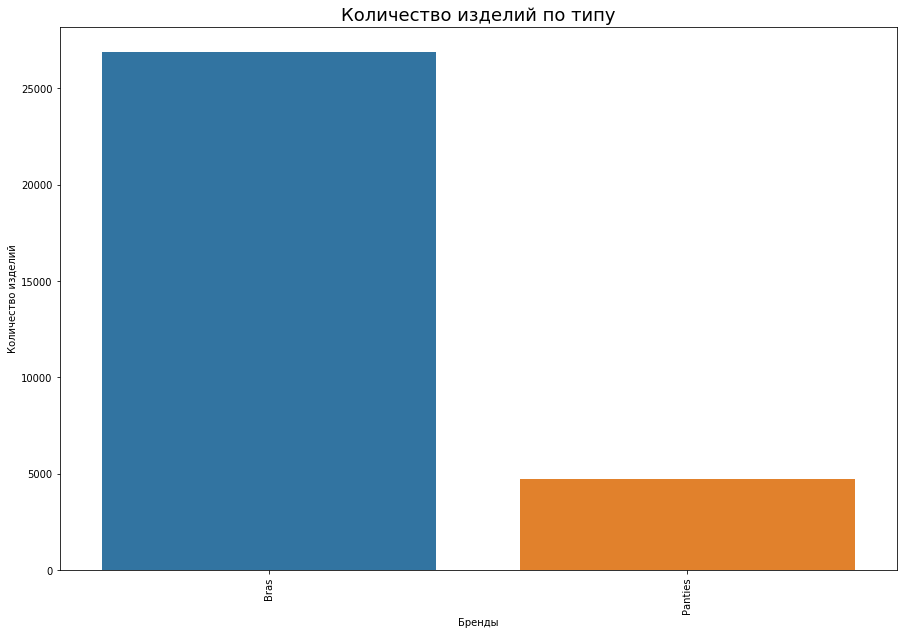

In [19]:
#трусики и лифчики
plt.figure(figsize=(15,10))
p = sn.countplot(data['product_category'])
plt.xlabel('Бренды')
plt.ylabel('Количество изделий')
p1 = plt.setp(p.get_xticklabels(), rotation=90)
plt.title("Количество изделий по типу", fontsize = '18')

Text(0.5, 1.0, 'Рейтинг изделий по оценкам на сайте магазина')

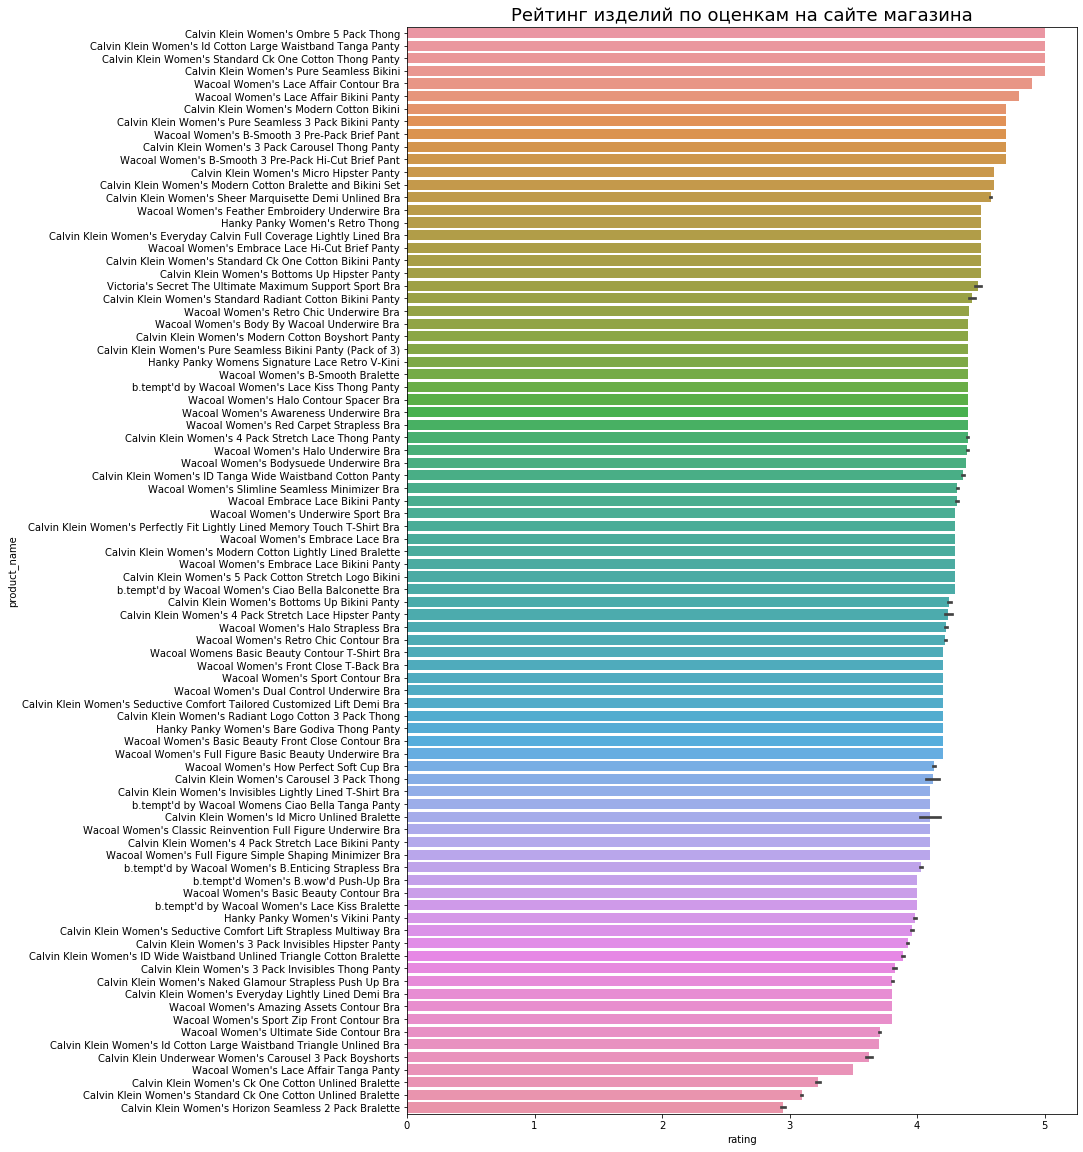

In [17]:
#самые низкооцененные по рейтингу в магазине
top50 = list(data.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(200).index)
df50 = data.loc[data['product_name'].isin(top50)]
plt.figure(figsize=(12,20))
sn.barplot(y='product_name', x='rating', data=df50, order=top50)
plt.title("Рейтинг изделий по оценкам на сайте магазина", fontsize = '18')

Text(0.5, 1, 'Матрица корреляции')

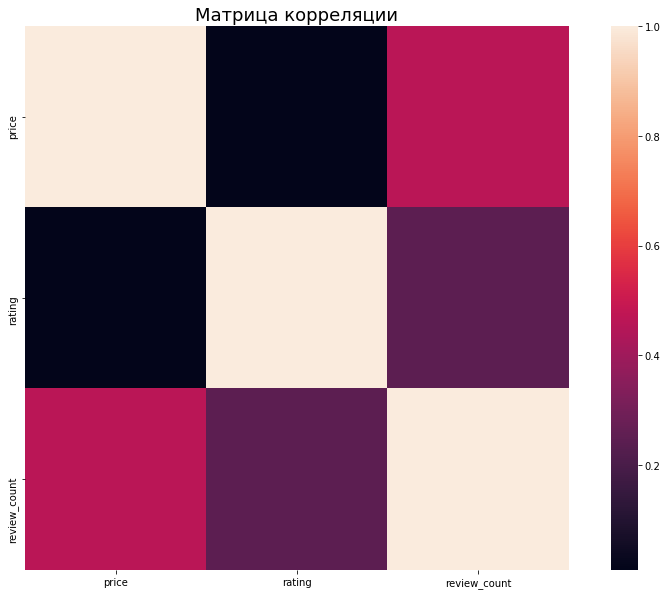

In [18]:
#матрица корреляции
corrmat = data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(corrmat, square=True);
plt.title("Матрица корреляции", fontsize = '18')